In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data Preparation & Preprocessing

The target feature ( machine failure ) is in unbalance state and the goal of this work is not find solutions for this issue but only to explore and study the SSL & AL techniques , that's why we'll extract the dataset to a balanced version which we'll use on this following work.

In [39]:
data_labeled = pd.read_csv("data/labeled.csv")
data_unlabeled = pd.read_csv("data/unlabeled.csv")
columns=data_labeled.columns
data_labeled

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [40]:
print("labeledset")
print("Machine failure (from): ",np.unique(data_labeled.loc[:,"Machine failure"],return_counts=True)[1])

# number of rows to keep in majority class
count_to_extract = np.unique(data_labeled.loc[:,"Machine failure"],return_counts=True)[1][1]

# extracting from the majority class
new_data_labeled_0 = np.array(data_labeled[data_labeled.loc[:,"Machine failure"] == 0])
np.random.shuffle(new_data_labeled_0)
new_data_labeled_0 = new_data_labeled_0[0:count_to_extract]

# concatenation to get the ne dataset
new_data_labeled_1 = np.array(data_labeled[data_labeled.loc[:,"Machine failure"] == 1])
new_data_labeled = np.vstack((new_data_labeled_1,new_data_labeled_0))
data_labeled = pd.DataFrame(new_data_labeled,columns=columns)

print("Machine failure (to): ",np.unique(data_labeled.loc[:,"Machine failure"],return_counts=True)[1])

labeledset
Machine failure (from):  [134281   2148]
Machine failure (to):  [2148 2148]


In [41]:
# drop ID's columns
data_labeled = data_labeled.drop(['Product ID','id'],axis=1)
data_unlabeled = data_unlabeled.drop(['Product ID','id'],axis=1)

# one hot to categorial features
data_labeled = pd.get_dummies(data_labeled,columns=['Type'])
data_unlabeled = pd.get_dummies(data_unlabeled,columns=['Type'])
data_labeled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,303.9,312.8,1345,56.5,21,1,0,0,0,0,0,0,1,0
1,302.5,310.4,1307,54.8,174,1,0,1,0,0,0,0,1,0
2,300.7,309.7,1878,27.9,20,1,0,0,0,0,0,0,0,1
3,297.3,308.6,1258,61.8,144,1,0,0,0,1,0,0,1,0
4,303.0,311.3,1341,51.0,174,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,299.3,310.7,2103,15.8,144,0,0,0,0,0,0,0,1,0
4292,301.3,310.0,1400,54.6,11,0,0,0,0,0,0,0,1,0
4293,300.9,310.5,1490,39.2,218,0,0,0,0,0,0,1,0,0
4294,299.6,309.3,1413,48.7,137,0,0,0,0,0,0,0,1,0


In [42]:
# normalization min-max to a column
def normalize_min_max(column):
    return (column - column.min()) / (column.max() - column.min())

# to all dataset
data_labeled = data_labeled.apply(normalize_min_max)
data_unlabeled = data_unlabeled.apply(normalize_min_max)
data = pd.concat((data_labeled,data_unlabeled),ignore_index=True)
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0.943182,0.894737,0.096188,0.723901,0.083004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.784091,0.578947,0.0739,0.700549,0.687747,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.579545,0.486842,0.408798,0.331044,0.079051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.193182,0.342105,0.045161,0.796703,0.56917,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.840909,0.697368,0.093842,0.648352,0.687747,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95245,0.769231,0.703704,0.183935,0.502747,0.059289,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95246,0.285714,0.506173,0.217695,0.412088,0.12253,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95247,0.032967,0.061728,0.19383,0.516484,0.73913,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95248,0.307692,0.259259,0.213038,0.501374,0.272727,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# extracting inputs data and target feature

inputs = data.drop('Machine failure',axis=1)
# update type of columns ( all to float64)
for col in inputs.columns:
    inputs[col] = inputs[col].astype('float32')

target = data.loc[:,'Machine failure']

After this step of preprocessing we get a complete dataset with a target column labeled at 4.5% (4296 rows with labels and 90954 without)

# 1. Semi-Supervised Learning SSL

## 1.1 Self training (pseudo-labeling)

this technique amounts to considering the predictions made by the model on unlabeled data as new labels which the model can use to refine its learning.

In [44]:
###################################################################

#Fonctions

# return the labeled / unlabeled data and also the labeled target column
def labeled_unlabeled_split(data,target):
    labeled_data = data[target.isna() == False] 
    unlabeled_data = data[target.isna()]
    
    return labeled_data,unlabeled_data,target[target.isna() == False]

###################################################################

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

inputs_labeled , inputs_unlabeled , target_labeled = labeled_unlabeled_split(inputs,target)
target_labeled = target_labeled.astype(int)

In [9]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(inputs_labeled,target_labeled)

best_params = grid_search.best_params_

In [10]:
# first step 

# fiting the model with the dataset labeled
best_tree_model = DecisionTreeClassifier(**best_params)
best_tree_model.fit(inputs_labeled,target_labeled)
prediction_labeled = best_tree_model.predict(inputs_labeled)
confidence_score = accuracy_score(prediction_labeled, target_labeled)
print(confidence_score)

0.9287709497206704


In [11]:
# second step

# if the confidence score is higher than a supposed threshold we can annotate the unlabeled dataset
prediction_unlabeled = best_tree_model.predict(inputs_unlabeled)

In [12]:
# third step

# create a complete dataset et evaluate it
new_target = np.hstack((target_labeled,prediction_unlabeled))

# in order to keep the order of samples and their matches on the target column
new_inputs = np.vstack((inputs_labeled , inputs_unlabeled))

In [13]:
inputs_unlabeled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
4296,0.769231,0.716049,0.192666,0.469780,0.237154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4297,0.703297,0.654321,0.317229,0.343407,0.067194,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4298,0.659341,0.580247,0.207800,0.465659,0.379447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4299,0.527473,0.481481,0.181024,0.601648,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4300,0.890110,0.814815,0.201979,0.515110,0.450593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95245,0.769231,0.703704,0.183935,0.502747,0.059289,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95246,0.285714,0.506173,0.217695,0.412088,0.122530,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95247,0.032967,0.061728,0.193830,0.516484,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95248,0.307692,0.259259,0.213038,0.501374,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# fourth step

# evaluation
model = LogisticRegression(C=0.01)
model.fit(new_inputs,new_target)
y_pred = model.predict(new_inputs)
accuracy = accuracy_score(new_target, y_pred)
print("accuracy : ",accuracy)

accuracy :  0.9348661417322834


## 1.2 Co-training

In order to obtain a more robust and less biased final solution, this strategy implements a first model, called the teacher, whose role is to generate the pseudo-labels which will be used to train the second model, called the student. Once the latter has been trained, the teacher model can be modified by taking inspiration from the student, and again generate pseudo-labels.

Processus : 
- 1- **Initializing models**: starting with two (or more) training models, each trained with a different portion of the available data. 

- 2- **Selection of confidential examples**: Models are used to classify unlabeled data. Examples where the models strongly disagree (i.e., give different predictions) are considered “confidential.” 

- 3- **Partial labeling**: Confidential examples are added to the labeled dataset, but with only the labels provided by a model for each example. 

- 4 - **Updating the models**: The models are then re-trained on the extended dataset (initial labeled data + partially labeled confidential examples).

- 5- **Iteration**: Steps 2 to 4 are repeated several times. With each iteration, the models become more and more efficient and the confidential examples gradually become fully labeled. 

Co-training exploits the assumption that if two models disagree on a prediction for a particular example, the likelihood that they could both be wrong is relatively small. By using the conflicting predictions of two models, co-training can actually improve overall performance by using the advantages of each model to compensate for the weaknesses of the other. This approach is often used for classification tasks where data is abundant but labels are expensive to obtain. However, the success of co-training depends on several factors, including model diversity, selection of relevant confidential examples, and convergence of the iterative training process.

### Two explicite iterations

##### Initializing models

In [15]:
def reorganize_data(inputs_labeled,target_labeled,se=42):    
    # get a list of a shuffled indexes
    indexes = np.arange(inputs_labeled.shape[0])
    np.random.seed(se)
    np.random.shuffle(indexes)
    set_size = inputs_labeled.shape[0] // 2

    # get two different sets of data for each of models
    inputs_labeled_1 = inputs_labeled.iloc[indexes[:set_size],:]
    target_labeled_1 = target_labeled.iloc[indexes[:set_size]]

    inputs_labeled_2 = inputs_labeled.iloc[indexes[set_size:],:] 
    target_labeled_2 = target_labeled.iloc[indexes[set_size:]] 
    
    return inputs_labeled_1 , target_labeled_1 , inputs_labeled_2 , target_labeled_2

In [16]:
inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2 = reorganize_data(inputs_labeled,target_labeled)

In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(inputs_labeled_1,target_labeled_1)

best_params = grid_search.best_params_

teacher = DecisionTreeClassifier(**best_params)
teacher.fit(inputs_labeled_1,target_labeled_1)

# classify unlabeled data
teacher_prediction_labeled = teacher.predict(inputs_unlabeled)

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(inputs_labeled_2,target_labeled_2)

best_params = grid_search.best_params_
student = grid_search.best_estimator_

# classify unlabeled data
student_prediction_labeled = student.predict(inputs_unlabeled)

##### selection of confidential examples

In [19]:
conf_exam_indexes = np.where(teacher_prediction_labeled != student_prediction_labeled)[0]
print(f"number of confidential examples : {conf_exam_indexes.shape[0]}")
print(f"disagreement rate : {conf_exam_indexes.shape[0] / teacher_prediction_labeled.shape[0]}")

number of confidential examples : 4995
disagreement rate : 0.05491787057193746


##### Partial labeling

To choose which confidential example will be label by which model : i choose the odd one to model 1 and even one  to model 2 

In [20]:
# indexes of confidential samples by models
to_label_by_model1 = [ind for ind in conf_exam_indexes if ind%2 == 0]
to_label_by_model2 = [ind for ind in conf_exam_indexes if ind%2 != 0]

# only targets
label_conf_exam_model1 = teacher_prediction_labeled[to_label_by_model1]
label_conf_exam_model2 = student_prediction_labeled[to_label_by_model2]
target_confidential = np.hstack((label_conf_exam_model1,label_conf_exam_model2))
target_confidential = pd.DataFrame(target_confidential,columns=['Machine failure'])

# only samples
conf_samples_model1 = inputs_unlabeled.iloc[to_label_by_model1]
conf_samples_model2 = inputs_unlabeled.iloc[to_label_by_model2]
inputs_confidential = np.vstack((conf_samples_model1,conf_samples_model2))
# to a dataframe
inputs_confidential = pd.DataFrame(inputs_confidential,columns=inputs_labeled.columns)

# remove the new labeled confidential samples from the unlabeled data
ind_to_drop = conf_exam_indexes + [4296]
inputs_unlabeled.drop(ind_to_drop,inplace=True)

##### Updating the models

In [21]:
# adding the confidential samples (with labeling) to the original dataset labeled
inputs_labeled_with_conf = pd.concat((inputs_labeled,inputs_confidential))
target_labeled = pd.DataFrame(target_labeled,columns=['Machine failure'])
target_labeled_with_conf = np.vstack((target_labeled,target_confidential))
target_labeled_with_conf = pd.DataFrame(target_labeled_with_conf,columns=['Machine failure'])

inputs_labeled_1_wf,target_labeled_1_wf,inputs_labeled_2_wf,target_labeled_2_wf = reorganize_data(inputs_labeled_with_conf,target_labeled_with_conf)

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(inputs_labeled_1_wf,target_labeled_1_wf)

best_params = grid_search.best_params_

teacher = DecisionTreeClassifier(**best_params)
teacher.fit(inputs_labeled_1_wf,target_labeled_1_wf)

# classify unlabeled data
teacher_prediction_labeled_wf = teacher.predict(inputs_unlabeled)

In [23]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(inputs_labeled_2_wf,target_labeled_2_wf)

best_params = grid_search.best_params_
student = grid_search.best_estimator_

# classify unlabeled data
student_prediction_labeled_wf = student.predict(inputs_unlabeled)

In [24]:
conf_exam_indexes_wf = np.where(teacher_prediction_labeled_wf != student_prediction_labeled_wf)[0]
print(f"number of confidential examples : {conf_exam_indexes_wf.shape[0]}")
print(f"disagreement rate : {conf_exam_indexes_wf.shape[0] / teacher_prediction_labeled_wf.shape[0]}")

number of confidential examples : 4677
disagreement rate : 0.05440966041950232


Number of unlabeled exemples will be decrease following the iterations because of the labeling we are doing.

### Functional version

In [25]:
def get_predictions_tree(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled):
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    tree_model = DecisionTreeClassifier()
    grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(inputs_labeled_1,target_labeled_1)

    best_params = grid_search.best_params_

    teacher = DecisionTreeClassifier(**best_params)
    teacher.fit(inputs_labeled_1,target_labeled_1)
    predi = teacher.predict(inputs_labeled_2)
    
    # classify unlabeled data
    return teacher.predict(inputs_unlabeled) , accuracy_score(target_labeled_2,predi)


def get_predictions_regression(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled):
    param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
    }

    logreg = LogisticRegression()

    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

    grid_search.fit(inputs_labeled_2,target_labeled_2)

    best_params = grid_search.best_params_
    student = grid_search.best_estimator_
    predi = student.predict(inputs_labeled_1)
    

    # classify unlabeled data
    return student.predict(inputs_unlabeled) , accuracy_score(target_labeled_1,predi)



def get_confidential_samples(predictions_teacher,predictions_student,verbose=False):
    '''
        return the indexes of confidential samples
    '''
    conf_exam_indexes = np.where(predictions_teacher != predictions_student)[0]
    
    if verbose:
        print(f"number of confidential examples : {conf_exam_indexes.shape[0]}")
        print(f"disagreement rate : {conf_exam_indexes.shape[0] / predictions_student.shape[0]}")
        print()
        
    disg_rate = conf_exam_indexes.shape[0] / predictions_student.shape[0]
    return conf_exam_indexes , disg_rate


def partial_labeling(conf_exam_indexes,inputs_unlabeled):
    
    # indexes of confidential samples by models
    to_label_by_model1 = [ind for ind in conf_exam_indexes if ind%2 == 0]
    to_label_by_model2 = [ind for ind in conf_exam_indexes if ind%2 != 0]

    # only targets
    label_conf_exam_model1 = teacher_prediction_labeled[to_label_by_model1]
    label_conf_exam_model2 = student_prediction_labeled[to_label_by_model2]
    target_confidential = np.hstack((label_conf_exam_model1,label_conf_exam_model2))
    target_confidential = pd.DataFrame(target_confidential,columns=['Machine failure'])

    # only samples
    conf_samples_model1 = inputs_unlabeled.iloc[to_label_by_model1]
    conf_samples_model2 = inputs_unlabeled.iloc[to_label_by_model2]
    inputs_confidential = np.vstack((conf_samples_model1,conf_samples_model2))
    # to a dataframe
    inputs_confidential = pd.DataFrame(inputs_confidential,columns=inputs_labeled.columns)

    # remove the new labeled confidential samples from the unlabeled data
    ind_to_drop = list(inputs_unlabeled.index[conf_exam_indexes])
    inputs_unlabeled.drop(ind_to_drop,inplace=True)

 
    
    return inputs_confidential,target_confidential


def updating_models(inputs_labeled,target_labeled,inputs_confidential,target_confidential):
    
    # adding the confidential samples (with labeling) to the original dataset labeled
    inputs_labeled_with_conf = pd.concat((inputs_labeled,inputs_confidential))
    target_labeled = pd.DataFrame(target_labeled,columns=['Machine failure'])
    target_labeled_with_conf = np.vstack((target_labeled,target_confidential))
    target_labeled_with_conf = pd.DataFrame(target_labeled_with_conf,columns=['Machine failure'])

    return inputs_labeled_with_conf , target_labeled_with_conf 


def co_training(inputs_labeled,target_labeled,inputs_unlabeled,niter_max=5,verbose=False):
    
    # initialisations
    acc_teacher = []
    acc_student = []
    count_unlab = []
    disg_rates = []
    itera = 0
    number_conf_exam = 0

    # shutdown condition : - unlabeled data is empty( we label all the unlabeled samples)
    #                      - there's no confidential samples so we label all the rest of data by the appropriate label                 
    print(f"Co-training process : {niter_max} iterations , teacher model : Decision tree & student model : Lineaire regression")
   

    while(itera != niter_max ):
        
        count_unlab.append(inputs_unlabeled.shape[0])
        
        # get different data to teacher and student model 
        inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2 = reorganize_data(inputs_labeled,target_labeled)
        
        # get unlabeled data predictions from teacher model
        predictions_teacher , accu_t = get_predictions_tree(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled)
        acc_teacher.append(accu_t)
        # get unlabeled data predictions from student model
        predictions_student , accu_s = get_predictions_regression(inputs_labeled_1,target_labeled_1,inputs_labeled_2,target_labeled_2,inputs_unlabeled)
        acc_student.append(accu_s)
        
        # confidential samples
        conf_exam_indexes , disg_rate = get_confidential_samples(predictions_teacher,predictions_student,verbose)
        disg_rates.append(disg_rate)
        number_conf_exam = conf_exam_indexes.shape[0]
        
        # generate a dataset(inputs and target) from the confidential samples by partial labeling
        inputs_confidential , target_confidential = partial_labeling(conf_exam_indexes,inputs_unlabeled)

        # update the models by the new dataset (with confidential dataset)
        # update the unlabeled data by droping the new labeled samples
        new_inputs_labeled , new_target_labeled = updating_models(inputs_labeled,target_labeled,inputs_confidential,target_confidential)
        inputs_labeled = new_inputs_labeled
        target_labeled = new_target_labeled
        itera += 1
        
    
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(131)
    plt.title("Accuracy")
    plt.legend()
    plt.plot(acc_teacher,label='teacher model')
    plt.plot(acc_student,label='student model')
    plt.legend()
    
    plt.subplot(132)
    plt.title("Number of unlabeled samples")
    plt.plot(count_unlab)
    
    plt.subplot(133)
    plt.title("Disagremment rates")
    plt.plot(disg_rates)
    
    plt.show()
        
    return inputs_labeled , target_labeled


Co-training process : 20 iterations , teacher model : Decision tree & student model : Lineaire regression


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


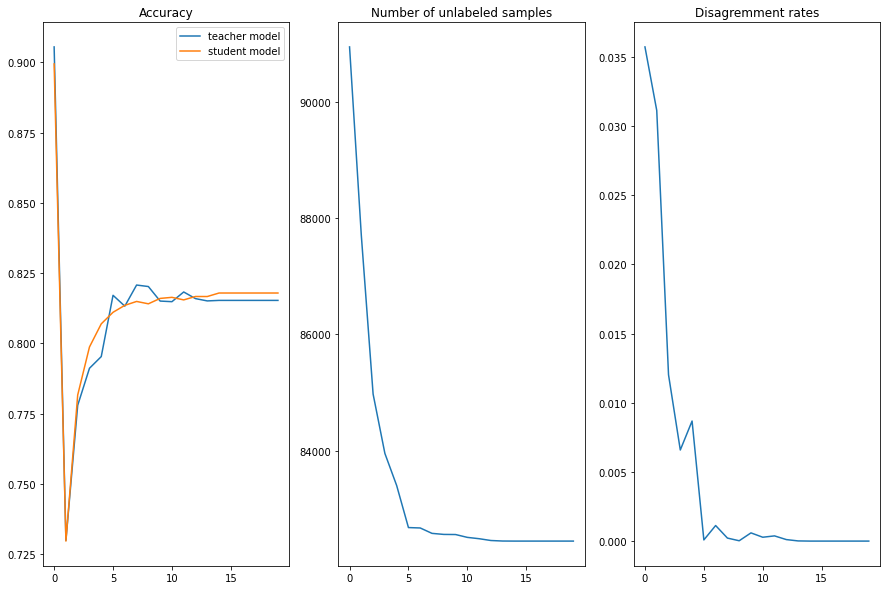

In [26]:
inputs_labeled , inputs_unlabeled , target_labeled = labeled_unlabeled_split(inputs,target)
target_labeled = target_labeled.astype(int)

final_inputs , final_target = co_training(inputs_labeled,target_labeled,inputs_unlabeled,20,False)

- given the ease of the problem to solve we see convergence after 20 iterations. We can still modify the stopping condition and force the labeling of all the labels.
- we can increase the speed of convergence by choosing two models with different architechtures because this trick will increase the confidential samples by iteration and decrease speedly the amount of unlabeled samples. 
- We can also stopping the process of the labeling if the target model reached a goal accuracy.

## 1.3 Generative models

An interesting example of the synchronous use of two types of models: generative and discriminative.
In the first step, the generator and the discriminator are trained together. This step is done in unsupervised mode: the real data provided to the discriminator during its learning are in fact unlabeled. This phase allows the discriminator to learn to extract important characteristics from the samples to correctly discriminate real data from fake ones.
He will be able to use this extraction capacity during the second, supervised phase. This time, the discriminator only receives labeled real data as input. Its mission: to learn how to correctly classify these images. 
This type of method therefore offers the possibility of training a classifier by exploiting both labeled and unlabeled data.

It is much more used in deep learning but we will still use it here to illustrate the process

- We will use **Gaussian Mixture Models (GMM)** as a generative model : GMMs are suitable for modeling continuous data. They assume that data is generated from a mixture of several Gaussian distributions.
- we ill use **k-Nearest Neighbors (k-NN)** as a discriminative model.

### Data generation

#### fiding the best hyperparameter

We have to optimize the hyperparemter **'n_components'** 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6399b15dc0>
Traceback (most recent call last):
  File "/home/amine/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/amine/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/amine/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/amine/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


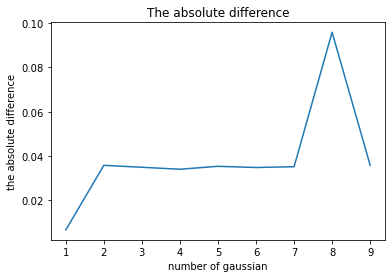

In [26]:
from sklearn.mixture import GaussianMixture

number_gaussian = np.arange(1,10)
difference__ = []

for nb_gauss in number_gaussian:

    # create the Gaussian mixture with nb_gauss
    gmm = GaussianMixture(n_components=nb_gauss, covariance_type='full', random_state=0)

    # fit the gmm with the unlabeled data
    gmm.fit(inputs_unlabeled)

    # number of samples to generate (same as the unlabeled data)
    n_samples = inputs_unlabeled.shape[0]  
    generated_data, _ = gmm.sample(n_samples)

    df_generated = pd.DataFrame(data=generated_data, columns=inputs_unlabeled.columns)
    
    # calculate the absolute difference between the original data and the generated 
    difference__.append(np.sum(np.abs((inputs_unlabeled - df_generated).mean())))

    
plt.title("The absolute difference")
plt.xlabel("number of gaussian")
plt.ylabel("the absolute difference")
plt.plot(number_gaussian,difference__)
plt.show()

In [27]:
nb_gauss_opt = 3

#### Generate data

In [28]:
gmm = GaussianMixture(n_components=nb_gauss_opt, covariance_type='full', random_state=0)

# fit the gmm with the unlabeled data
gmm.fit(inputs_unlabeled)

# number of samples to generate (same as the unlabeled data)
n_samples = inputs_unlabeled.shape[0]  
inputs_generated, _ = gmm.sample(n_samples)

inputs_generated = pd.DataFrame(data=inputs_generated, columns=inputs_unlabeled.columns)

### [real,fake] data classification

#### create the complete dataset and target feature

We have to concatenate the original unlabeled data and the generated one in order to have a complete dataset , we have also to create a binary vector (0/1) to classifiy the real and generated data . 

In [29]:
inputs_complete = pd.concat((inputs_unlabeled,inputs_generated))

# 0 --> original data / 1 --> generated data 
target_complete = np.array([ [0]*inputs_unlabeled.shape[0] + [1]*inputs_generated.shape[0]]).T                  

#### fitting the discriminative model 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(inputs_complete,target_complete)

KNeighborsClassifier(n_neighbors=3)

### [machine failure , not machine failure] data classification

The discriminative model is ready : fitting before with the (real/fake) unalbeled data , now we will fit it on the labeled data.

In [31]:
neigh.fit(inputs_labeled_1,target_labeled_1)
pr = neigh.predict(inputs_labeled_2)
accuracy_score(pr,target_labeled_2)

0.8915270018621974

## 1.4 Graphes

The founding idea of this type of approach is essentially the hypothesis that similar data should have the same label.
- 1/ **Construction of the graph**: to do this, a similarity metric must be determined. It can be chosen beforehand (e.g.: the Euclidean distance between the representations of the inputs in a latent space) or learned in an unsupervised manner. Once this metric is chosen, it can be used to quantify the similarity of each pair of samples. This is how we can set up a graph in which the nodes represent the samples (e.g. images) and the edges, more or less thick, symbolize the more or less strong similarity between them. This first step takes place in unsupervised mode, it does not use labels.
- 2/ **Label prediction**: it is now a matter of exploiting the available labels by relying on the structure of the graph to predict the class of unlabeled samples. Among the existing techniques, we can notably cite Label propagation which, as its name indicates, “propagates” the labels and assigns to each sample the class appearing most frequently among its neighboring nodes.

### Construction of the graph

#### Learning a latent space 

In [47]:
all_inputs = pd.concat((inputs_labeled,inputs_unlabeled))

In [48]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = 13
encoding_dim = 2
epochs = 20
batch_size = 100

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(all_inputs,all_inputs, epochs=epochs, batch_size=batch_size)

Epoch 1/20
953/953 [==============================] - 2s 1ms/step - loss: 0.0648
Epoch 2/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0220
Epoch 3/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0186
Epoch 4/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0167
Epoch 5/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0153
Epoch 6/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0143
Epoch 7/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0136
Epoch 8/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0130
Epoch 9/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0125
Epoch 10/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 11/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 12/20
953/953 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 13/20
953/953 [====

In [49]:
encoder = Model(input_layer, encoded)
# encode the inputs
inputs_labeled_ls = encoder.predict(inputs_labeled)
inputs_unlabeled_ls = encoder.predict(inputs_unlabeled)

2843/2843 [==============================] - 2s 817us/step


#### similarity by euclidian distance

- To represent the distance graphe between nodes : we will use a dictionnary structure .
- for every sample in the unlabeled dataset we will map a vector of label of all labeled dataset's samples which their distance is lower than a threshold (to say that they are neighbors ).  

***for reasons of convergence time, we will label only 200 samples from the unlabeled dataset***

In [51]:
from tqdm import tqdm

def dist_eucl(data1,data2):
    return np.linalg.norm(data1 - data2)

In [35]:

# initialize the dict with index of unlabeled dataset samples and an empty vector
graph = dict()
keys = inputs_unlabeled.index[:200]
graph = {key: [] for key in keys}

thresh = 5
target_unlabeled = []

for key in tqdm(keys):
    # obligation to filter and reduce the neirest neighors by selecting only those distance is lower than a thresh
    graph[key] = [ target_labeled.iloc[ind] for ind in inputs_labeled.index if dist_eucl(inputs_labeled_ls[ind],inputs_unlabeled_ls[key]) < thresh]
    # get the label most frequently by sample
    values,counts = np.unique(graph[key],return_counts=True)
    label = values[np.argmax(counts)]
    # create the label for the sample
    target_unlabeled.append(label)

100%|█████████████████████████████████████████| 200/200 [01:12<00:00,  2.77it/s]


In [41]:
# create a complete dataset 
inputs_labeled_ = inputs_unlabeled.iloc[keys]
new_target_labeled = pd.DataFrame(target_unlabeled,columns=['Machine failure'])

new_inputs_labeled = pd.concat((inputs_labeled , inputs_labeled_))
new_target_labeled = pd.concat((target_labeled , new_target_labeled))

# training a model and check the performance
data1,data2,data3,data4 = reorganize_data(new_inputs_labeled , new_target_labeled)
logreg = LogisticRegression(C=0.01,penalty='l2')
logreg.fit(data1,data2)
predi = logreg.predict(data3)
accuracy_score(predi,data4)

0.8451957295373665

# 2.Active Learning - AL

Active learning is a supervised machine learning approach in which a model is able to select the data examples from which it will learn, rather than relying solely on a static dataset predefined. Unlike passive learning, where the model learns from a fixed data set, in active learning the model can ask questions or actively choose the examples it wants to be trained on.

## 2.1 Uncertainty

A first approach, undoubtedly among the most widespread, is based on measuring the uncertainty of the model. In other words, we want to label the samples for which the model is the least confident in its predictions.

To quantify the uncertainty of a classifier, we can rely on the probabilities that it assigns to each unlabeled sample of belonging to this or that class. A first technique, for example, uses, for a given sample, its maximum probability (i.e. the probability corresponding to the class predicted by the classifier). If this probability is high, it means that the classifier was particularly confident. A low maximum probability, on the contrary, is a sign that the prediction is “uncertain”, and can therefore be used as a selection criterion for the next samples to be labeled.

In the same vein, we can also cite the minimum margin technique. Here, the selection criterion is no longer based only on the maximum probability, but also on the second maximum probability. In other words, the selection criterion is defined by the difference between the two highest probabilities among those predicted by the model for a given sample. If this margin is small, this indicates that the model “hesitates” between two classes, so it is an interesting measure of uncertainty.

In [26]:
def labeling_with_uncertainty(data,target,inputs_unlabeled,niter_max=5):
    
    accuricies = []
    count_unlab = []
    itera = 0
    
    
    
    while(itera != niter_max):
        
        # to stack the different shapes of unlabeled dataset
        count_unlab.append(inputs_unlabeled.shape[0])
        # fitting a model 
        logreg = LogisticRegression(C=0.01,penalty='l2')
        logreg.fit(data,target)
        predi = logreg.predict(data)
        accuricies.append(accuracy_score(predi,target))

        # get the probabilities of the model's prediction
        proba_predictions = logreg.predict_proba(inputs_unlabeled)
        # get the samples which the model is certain
        ind_samples_certainly = np.where(np.abs(proba_predictions[:,0] - proba_predictions[:,1]) > 0.4)[0]
        # print the labels of this samples
        labels = np.argmax(proba_predictions[ind_samples_certainly],axis=1)
        labels = pd.DataFrame(labels,columns=['Machine failure'])
        
        # concat the new data
        new_inputs_labeled = pd.concat((data , inputs_unlabeled.iloc[ind_samples_certainly]))
        # concat the new target
        target = pd.DataFrame(target,columns=['Machine failure'])
        new_target_labeled = np.vstack((target , labels))
        new_target_labeled = pd.DataFrame(new_target_labeled,columns=['Machine failure'])
        data = new_inputs_labeled
        target = new_target_labeled
        
        
        # update the unlabeled data
        ind_to_drop = list(inputs_unlabeled.index[ind_samples_certainly])
        inputs_unlabeled.drop(ind_to_drop,inplace=True)
        
        itera += 1

    # display
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.title("Accuracy of model")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.plot(accuricies)
        
    plt.subplot(122)
    plt.title("Number of unlabeled samples")
    plt.xlabel("Iterations")
    plt.ylabel("Number")
    plt.plot(count_unlab)
    plt.show()

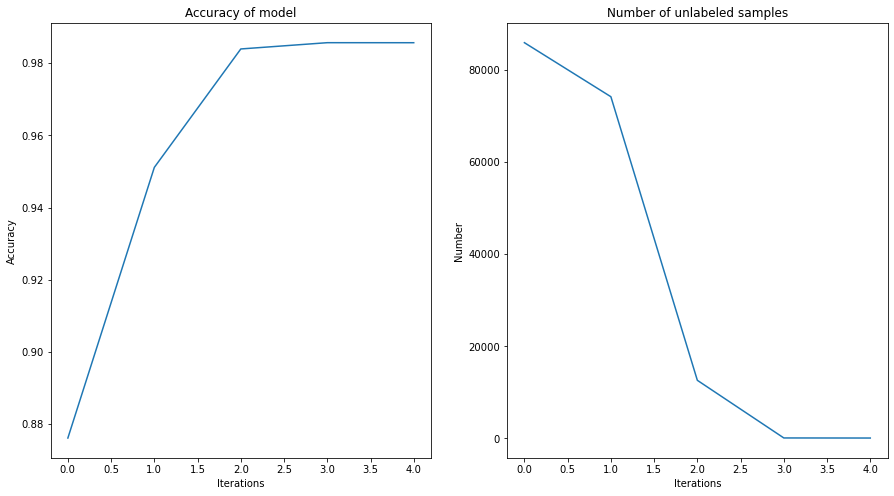

In [27]:
labeling_with_uncertainty(inputs_labeled,target_labeled,inputs_unlabeled)

We are seeing that the accuracy of the model increase when we fit it with more and more data generated by the model itself by labeling with the metric of uncertainty

## 2.2 Diversity

Another strategy consists of selecting samples as diverse as possible to best cover the entire input space.
The idea behind this approach is to maximize the diversity of labeled samples. By selecting samples that are far apart in the feature space, we ensure that you cover different regions of the data space, which can help improve the generalization ability of the model.

Among the existing methods, we can name that of k-center , which we find in graph theory. Generally speaking, the k-center problem is illustrated as follows: given n cities separated from each other by known distances, where to build k stores in some of these cities so as to minimize the maximum distance between a town and a store?

In our case :
 - Calculate the distance between each unlabeled sample and the labeled sample closest to it.
 - Select the samples to be labeled with the greatest distances.
 
Once the selection is finished we can use any strategy of data labeling and then get new data to incorporate it to initial labeled dataset . 

#### Learning a latent space 

In [32]:
inputs_labeled , inputs_unlabeled , target_labeled = labeled_unlabeled_split(inputs,target)
target_labeled = target_labeled.astype(int)

***for reasons of convergence time, we will select only 200 samples from the unlabeled dataset***

In [74]:
# initialize the dict with index of unlabeled dataset samples and an empty vector
graph = dict()
keys = np.random.randint(1,inputs_unlabeled.shape[0],300)
graph = {key: [] for key in keys}
distances = []
clost_dist = []
clost_dist_ind_sam = []

for key in tqdm(keys):
    for ind , lab_sam in inputs_labeled.iterrows():
        distances.append(dist_eucl(inputs_unlabeled.iloc[key] , lab_sam))
    graph[key] = (np.max(distances) ,ind)

100%|█████████████████████████████████████████| 300/300 [03:47<00:00,  1.32it/s]


In [84]:
list(graph.values())[:5]

[(2.3489132, 4295),
 (2.3509235, 4295),
 (2.3509235, 4295),
 (2.4308927, 4295),
 (2.4308927, 4295)]

The notion of distance in this case of data does not make much sense, which is why we propose a measure of similarity such as cosine similarity.

We think about the selection approaches based on diversity as a strategy encouraging the selection of samples that do not resemble the samples already labeled. The similarity of two samples can for example be evaluated via the cosine similarity function.

In [86]:
def cos_similarity(vector1,vector2):
    # Calculer la similarité cosinus
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    return dot_product / (norm_vector1 * norm_vector2)

In [105]:
# initialize the dict with index of unlabeled dataset samples and an empty vector
graph = dict()
keys = np.random.randint(1,inputs_unlabeled.shape[0],300)
graph = {key: [] for key in keys}
similarities = []

for key in tqdm(keys):
    for ind , lab_sam in inputs_labeled.iterrows():
        similarities.append(cos_similarity(inputs_unlabeled.iloc[key] , lab_sam))
    # mean similarity of all labeled samples
    graph[key] = [np.mean(similarities) , key]

100%|█████████████████████████████████████████| 300/300 [02:46<00:00,  1.80it/s]


In [131]:
# selecting the K samples with the lower mean similarity
k = 30
values = np.array(list((graph.values())))[:,0]
indices = np.array(list((graph.values())))[:,1]
indices_des_plus_petites = np.argsort(values)[:k].tolist()

samples_to_label = inputs_unlabeled.iloc[indices[indices_des_plus_petites]]
samples_to_label.head(4)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
43191,0.417582,0.308642,0.169383,0.568681,0.177866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82419,0.560440,0.444444,0.300931,0.343407,0.794466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24411,0.802198,0.654321,0.198487,0.413462,0.470356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72813,0.725275,0.641975,0.185099,0.451923,0.260870,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2.3 Expected change

### Expected gradient length - EGL